In [14]:

dp.means <- function(data, lambda = 1, max.iterations = 100, tolerance = 10e-3)
{
  n <- nrow(data)
  k <- 1
  assignments <- rep(1, n)
  mu.x <- mean(data$x)
  mu.y <- mean(data$y)
  
  converged <- FALSE
  iteration <- 0
  
  ss.old <- Inf
  ss.new <- Inf
  
  while (!converged && iteration < max.iterations)
  {
    iteration <- iteration + 1
        
    for (i in 1:n)
    {
      distances <- rep(NA, k)
      
      for (j in 1:k)
      {
        distances[j] <- (data[i, 'x'] - mu.x[j])^2 + (data[i, 'y'] - mu.y[j])^2
      }
      
      if (min(distances) > lambda)
      {
        k <- k + 1
        assignments[i] <- k
        mu.x[k] <- data[i, 'x']
        mu.y[k] <- data[i, 'y']
      } else
      {
        assignments[i] <- which(distances == min(distances))
      }
    }
    
    for (j in 1:k)
    {
      if (length(assignments == j) > 0)
      {
        mu.x[j] <- mean(data[assignments == j, 'x'])
        mu.y[j] <- mean(data[assignments == j, 'y'])
      }
    }
    
    ss.new <- 0
      
    for (i in 1:n)
    {
      ss.new <- ss.new + (data[i, 'x'] - mu.x[assignments[i]])^2 + (data[i, 'y'] - mu.y[assignments[i]])^2
    }
    
    ss.change <- ss.old - ss.new
    ss.old <- ss.new
    
    if (!is.nan(ss.change) && ss.change < tolerance)
    {
      converged <- TRUE
    }
  }
  
  centers <- data.frame(x = mu.x, y = mu.y)
  
  return(list("centers" = centers, "assignments" = factor(assignments), "k" = k, "iterations" = iteration))
}

In [2]:

generate.data <- function()
{
  n <- 100
  data <- data.frame(x = rep(NA, n), y= rep(NA, n), assignment = rep(NA, n))
  mu.x <- c(0, 5, 10, 15)
  mu.y <- c(0, 5, 0, -5)
  
  for (i in 1:n)
  {
    assignment <- sample(1:4, 1)
    data[i, 'x'] <- rnorm(1, mu.x[assignment], 1)
    data[i, 'y'] <- rnorm(1, mu.y[assignment], 1)
    data[i, 'assignment'] <- assignment
  }
  
  data <- transform(data, assignment = factor(assignment))
  
  return(data)
}

In [7]:
gen <- generate.data()

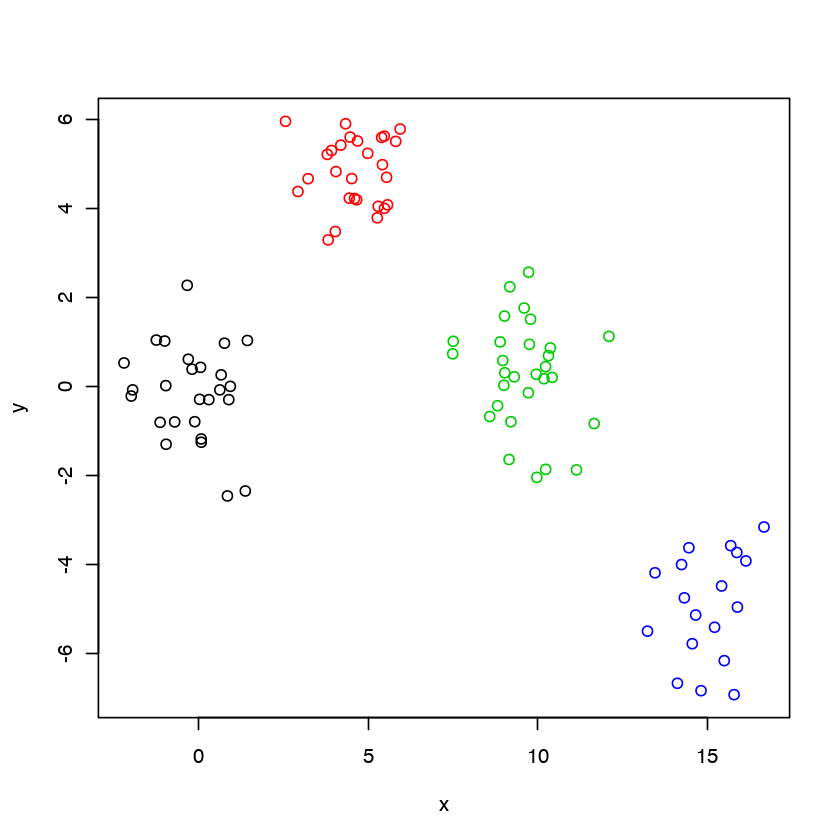

In [8]:
plot(gen[,1:2], col=gen[,3])

In [10]:
library(ggplot2)

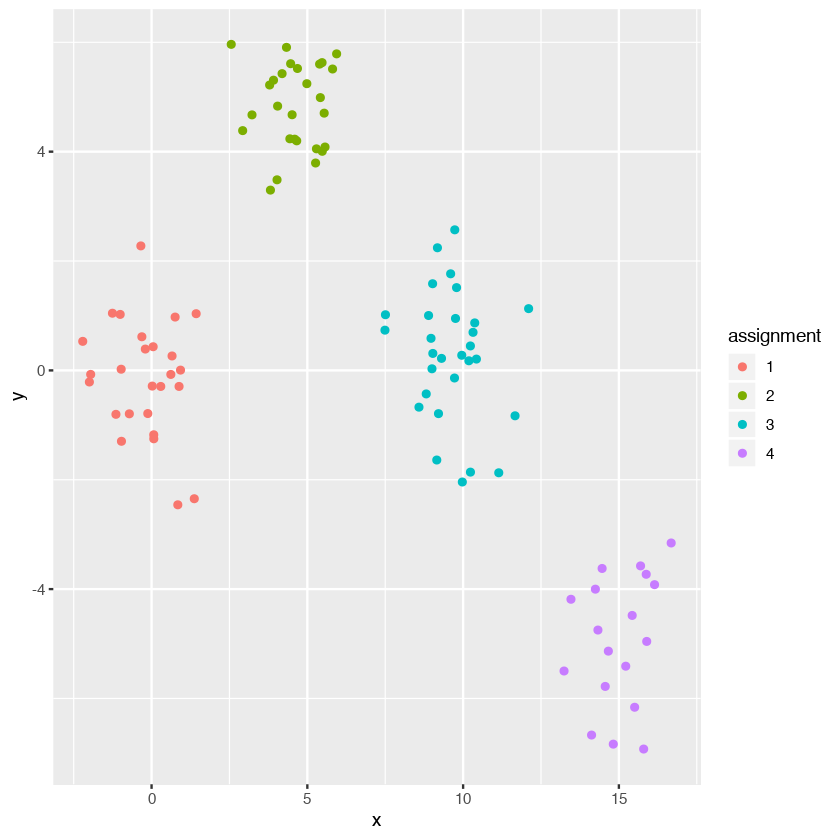

In [11]:
ggplot(gen, aes(x = x, y = y, color = assignment)) + geom_point()

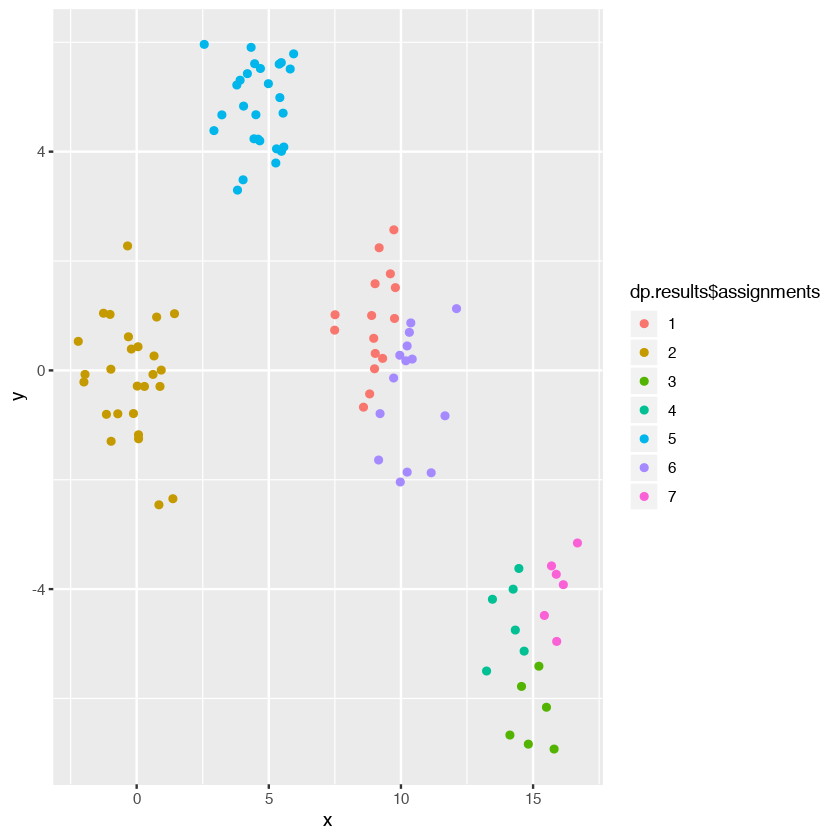

In [20]:
dp.results <- dp.means(gen, 10)

ggplot(gen, aes(x = x, y = y, color = dp.results$assignments)) + geom_point()